In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Step 1: Data Preparation and Preprocessing
df = pd.read_csv('/Users/hitteshkumarm/Desktop/COLLEGE/FeyNN Labs/RS_Session_255_AU_2349_1.csv')
df.head(5)

,Sl. No.,State/UT,Total Number of active Vehicle as on 08.12.2021,Total number of active Electric Vehicles as on 08.12.2021
0,1,Andaman and Nicobar Island,143529,157
1,2,Arunachal Pradesh,235189,20
2,3,Assam,4445227,43707
3,4,Bihar,9816784,58655
4,5,Chandigarh,720272,1791


In [3]:
# Data Cleaning
# Remove the "Grand Total" row
df = df[df['State/UT'] != 'Grand Total']

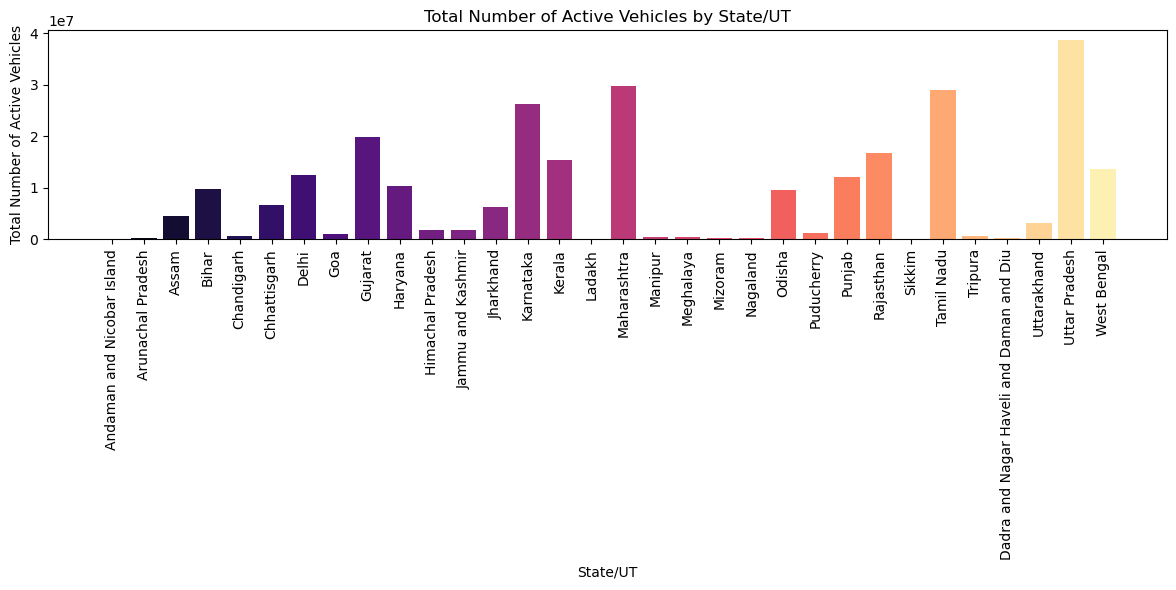

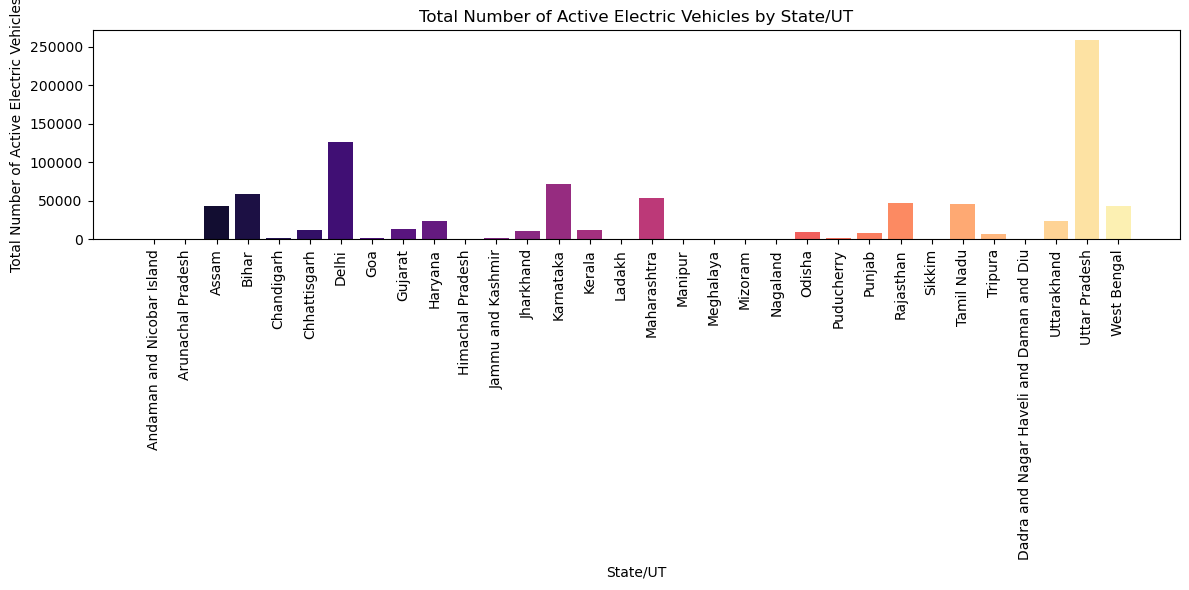

In [10]:
# Step 2: Data Analysis and Visualization

# Create a color gradient for the bar charts
colors = sns.color_palette("magma", len(df))

# Bar chart for Total Number of Active Vehicles by State/UT with gradient colors
plt.figure(figsize=(12, 6))
plt.bar(df['State/UT'], df['Total Number of active Vehicle as on 08.12.2021'], color=colors)
plt.xticks(rotation=90)
plt.title('Total Number of Active Vehicles by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Total Number of Active Vehicles')
plt.tight_layout()
plt.show()

# Bar chart for Total Number of Active Electric Vehicles by State/UT with gradient colors
plt.figure(figsize=(12, 6))
plt.bar(df['State/UT'], df['Total number of active Electric Vehicles as on 08.12.2021'], color=colors)
plt.xticks(rotation=90)
plt.title('Total Number of Active Electric Vehicles by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Total Number of Active Electric Vehicles')
plt.tight_layout()
plt.show()






In [7]:
# Step 3: Clustering Algorithm

# Feature Selection and Scaling
X = df[['Total Number of active Vehicle as on 08.12.2021', 'Total number of active Electric Vehicles as on 08.12.2021']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
k = 3  # You can adjust the number of clusters as needed
n_init = 10  # Number of times the k-means algorithm will be run with different centroid seeds
kmeans = KMeans(n_clusters=k, random_state=0, n_init=n_init)
df['Cluster'] = kmeans.fit_predict(X_scaled)

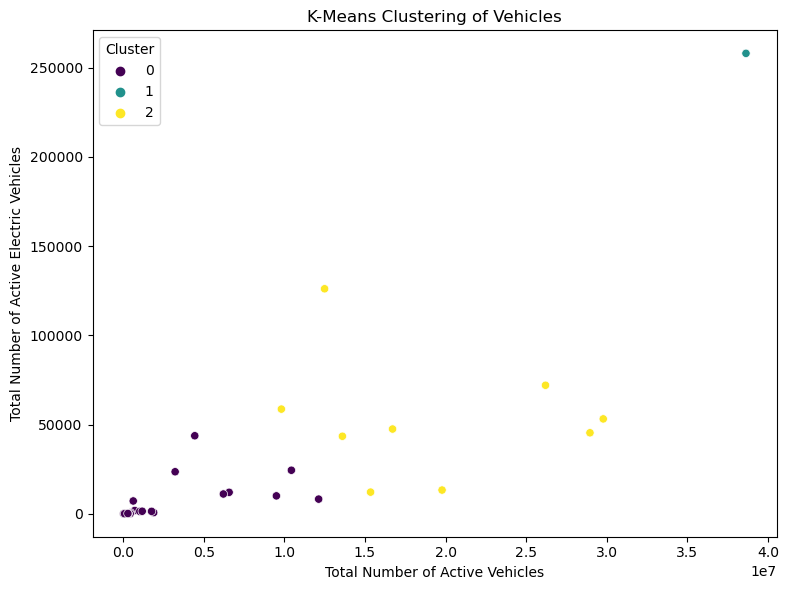

In [8]:
# Step 4: Visualization of Clusters

# Scatter plot for Total Number of Active Vehicles vs. Total Number of Active Electric Vehicles
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Total Number of active Vehicle as on 08.12.2021', y='Total number of active Electric Vehicles as on 08.12.2021', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering of Vehicles')
plt.xlabel('Total Number of Active Vehicles')
plt.ylabel('Total Number of Active Electric Vehicles')
plt.tight_layout()
plt.show()